In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x0 = np.ones(10)
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
x2 = np.ones(10)
X = np.vstack((x1,x2)).T
Y = [1.56, 1.95, 2.44, 3.05, 3.81, 4.77, 5.96, 7.45, 9.31, 11.64]

# get the model
mdl = LinearRegression().fit(X,Y)
w0 = mdl.intercept_
w1, w2 = mdl.coef_

print("w0 =",w0)
print("w1 =",w1)
print("w2 =",w2)

w0 = -0.7053333333333338
w1 = 1.0726060606060608
w2 = 0.0


Text(0.5, 0, 'Y')

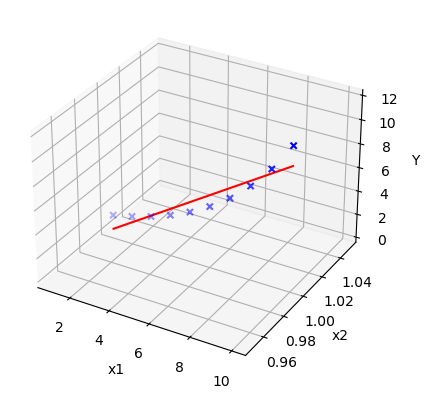

In [3]:
# Creamos la figura
fig = plt.figure()

# Agregamos un plano 3D
ax = plt.axes(projection='3d')

# Para la recta obtenemos la prediccion con los valores del entrenamiento y
# se muestra graficamente utilizando la entrada del dataset y los valores predecidos
ry = mdl.predict(X)
ax.plot(x1, x2, ry, c='red')

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
ax.scatter(x1, x2, Y,  c='b', marker='x')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y')

Text(0.5, 0.92, 'J(W) a partir de Log V(w)')

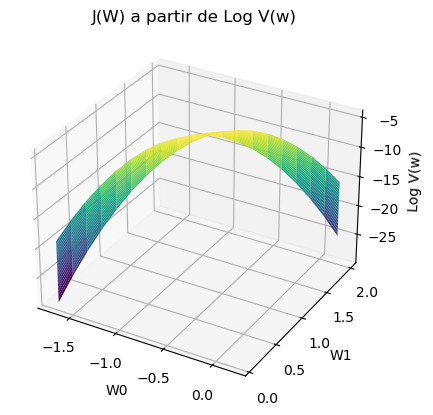

In [4]:
import math

n_datos = 20

w0 = -0.705 - n_datos/20
w1 = 1.073 - n_datos/20
w2 = 0

w0_arr = np.ones(n_datos)
w1_arr = np.ones(n_datos)

n = len(x1)
J = np.ones((n_datos,n_datos))

for i in range(n_datos):
	w0_arr[i] = w0 + 0.1*i
	w1_arr[i] = w1 + 0.1*i

sumatorio = 0
verosimilitud = np.ones((n_datos,n_datos))
media = 0
desv_tip = 1

for i in range(n_datos):
	for j in range (n_datos):
		for k in range(n):
			sumatorio = sumatorio + (Y[k] - (w0_arr[i] + w1_arr[j]*x1[k] + w2*x2[k]))**2
 
		J[i][j] = 1/(2*n)*sumatorio
		verosimilitud[i][j] = n*math.log10(1/math.sqrt(2*math.pi*desv_tip)) - 1/((desv_tip)**2) * J[i][j]
		sumatorio = 0

# Creamos la figura
fig2 = plt.figure()

# Agregamos un plano 3D
ax2 = plt.axes(projection='3d')

# Crear la trama de malla (mesh)
surf = ax2.plot_surface(w0_arr, w1_arr, verosimilitud, cmap='viridis')

# Agregar etiquetas y título
ax2.set_xlabel('W0')
ax2.set_ylabel('W1')
ax2.set_zlabel('Log V(w)')
ax2.set_title('J(W) a partir de Log V(w)')

In [5]:
from sklearn.linear_model import LogisticRegression

x1 = np.array([0.89, 0.41, 0.04, 0.75, 0.15, 0.14, 0.61, 0.25, 0.32, 0.40, 1.26, 1.68, 1.23, 1.46, 1.38, 1.54, 1.99, 1.76, 1.98, 1.23])
x2 = np.array([0.41, 0.39, 0.61, 0.17, 0.19, 0.09, 0.32, 0.77, 0.23, 0.74, 1.53, 1.05, 1.76, 1.60, 1.86, 1.99, 1.93, 1.41, 1.00, 1.54])
x3 = np.array([0.69, 0.82, 0.83, 0.29, 0.31, 0.52, 0.33, 0.83, 0.81, 0.56, 1.21, 1.22, 1.33, 1.10, 1.75, 1.75, 1.54, 1.34, 1.83, 1.55])

X = np.vstack((x1,x2,x3)).T
Y = np.array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]);

mdl = LogisticRegression(penalty=None).fit(X,Y)

w0 = mdl.intercept_
w123 = mdl.coef_
w1 = w123[0][0]
w2 = w123[0][1]
w3 = w123[0][2]
print("w0 =", w0[0], "w1 =", w1, "w2 =", w2, "w3 =", w3)

w0 = 1.9147479128823561 w1 = -0.27473347539409887 w2 = -0.7340349718870062 w3 = -0.9043650329461987


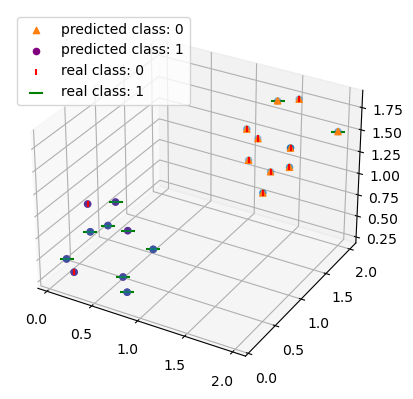

In [6]:
# Representamos los datos de entrada (x1,x2, x3) con la salida Y(clase 0 = o; clase 1 = +)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1,x2,x3)

# Calculamoslas predicciones
Ye = mdl.predict(X)
clase_1_x1 = []
clase_1_x2 = []
clase_1_x3 = []
clase_2_x1 = []
clase_2_x2 = []
clase_2_x3 = []

for i in range(len(Ye)):
	if Ye[i] == 0:
		clase_1_x1.append(x1[i])
		clase_1_x2.append(x2[i])
		clase_1_x3.append(x3[i])
	else:
		clase_2_x1.append(x1[i])
		clase_2_x2.append(x2[i])
		clase_2_x3.append(x3[i])

ax.scatter(clase_1_x1, clase_1_x2, clase_1_x3,marker='^', s=20, alpha= 1, label='predicted class: 0')
ax.scatter(clase_2_x1, clase_2_x2, clase_2_x3,marker='o', c="purple", alpha= 1, label='predicted class: 1')

# Representamos datos del set de entrenamiento
clase_1_x1 = []
clase_1_x2 = []
clase_1_x3 = []
clase_2_x1 = []
clase_2_x2 = []
clase_2_x3 = []

for i in range(len(Y)):
	if Y[i] == 0:
		clase_1_x1.append(x1[i])
		clase_1_x2.append(x2[i])
		clase_1_x3.append(x3[i])
	else:
		clase_2_x1.append(x1[i])
		clase_2_x2.append(x2[i])
		clase_2_x3.append(x3[i])

ax.scatter(clase_1_x1, clase_1_x2, clase_1_x3,marker="|", c='red',s=20, alpha= 1, label='real class: 0')
ax.scatter(clase_2_x1, clase_2_x2, clase_2_x3,marker="_", c='green', s= 100, alpha= 1, label='real class: 1')
ax.legend()

In [7]:
errors = 0
N = 20
for i in range(len(Ye)):
	if Y[i] != Ye[i]:
		errors = errors + 1

porcentage = errors/20*100

print(porcentage)

20.0
